In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot
import math
from IPython.core import page
page.page=print

import brfss

In [8]:
%psource thinkstats2.NormalPdf

class NormalPdf(Pdf):
    """Represents the PDF of a Normal distribution."""

    def __init__(self, mu=0, sigma=1, label=None):
        """Constructs a Normal Pdf with given mu and sigma.

        mu: mean
        sigma: standard deviation
        label: string
        """
        self.mu = mu
        self.sigma = sigma
        self.label = label if label is not None else '_nolegend_'

    def __str__(self):
        return 'NormalPdf(%f, %f)' % (self.mu, self.sigma)

    def GetLinspace(self):
        """Get a linspace for plotting.

        Returns: numpy array
        """
        low, high = self.mu-3*self.sigma, self.mu+3*self.sigma
        return np.linspace(low, high, 101)

    def Density(self, xs):
        """Evaluates this Pdf at xs.

        xs: scalar or sequence of floats

        returns: float or NumPy array of probability density
        """
        return stats.norm.pdf(xs, self.mu, self.sigma)



In [17]:
df=brfss.ReadBrfss(nrows=None)

In [18]:
df.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0


In [20]:
female=df[df.sex==2]
female_heights=female.htm3.dropna()
mean,std=female_heights.mean(),female_heights.std()
mean,std

(163.22347500412215, 7.269156286641344)

In [21]:
pdf=thinkstats2.NormalPdf(mean,std)
pdf.Density(mean+std)

0.03328731904744125

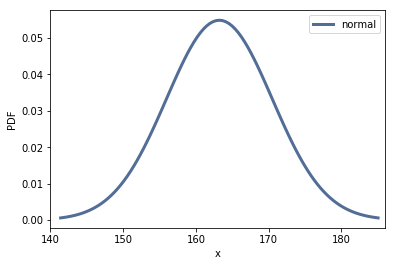

In [22]:
thinkplot.Pdf(pdf,label='normal')
thinkplot.Config(xlabel='x',ylabel='PDF',xlim=[140,186])

In [23]:
arr=np.array([1,4,5,2,8,9,6,7,3,0])

In [26]:
mean1=arr.mean()

In [27]:
std1=arr.std()

In [32]:
for i in arr:
    v=(i-mean1)/std1
    print(v)

-1.2185435916898848
-0.17407765595569785
0.17407765595569785
-0.8703882797784892
1.2185435916898848
1.5666989036012806
0.5222329678670935
0.8703882797784892
-0.5222329678670935
-1.5666989036012806


In [38]:
pmf=pdf.MakePmf()

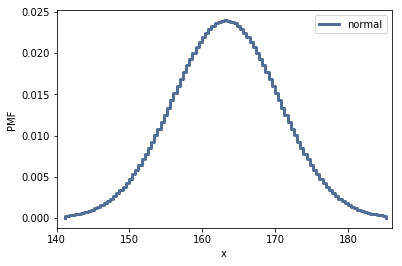

In [39]:
thinkplot.Pmf(pmf,label='normal')
thinkplot.Config(xlabel='x',ylabel='PMF',xlim=[140,186])

In [43]:
%psource thinkstats2.EstimatedPdf

class EstimatedPdf(Pdf):
    """Represents a PDF estimated by KDE."""

    def __init__(self, sample, label=None):
        """Estimates the density function based on a sample.

        sample: sequence of data
        label: string
        """
        self.label = label if label is not None else '_nolegend_'
        self.kde = stats.gaussian_kde(sample)
        low = min(sample)
        high = max(sample)
        self.linspace = np.linspace(low, high, 101)

    def __str__(self):
        return 'EstimatedPdf(label=%s)' % str(self.label)

    def GetLinspace(self):
        """Get a linspace for plotting.

        Returns: numpy array
        """
        return self.linspace

    def Density(self, xs):
        """Evaluates this Pdf at xs.

        returns: float or NumPy array of probability density
        """
        return self.kde.evaluate(xs)

    def Sample(self, n):
        """Generates a random sample from the estimated Pdf.

        n: size of sample
        """
        # NOTE: 

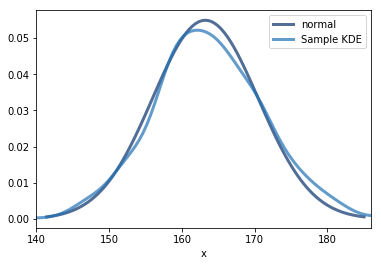

In [50]:
'''
pmf cdf cmf pdf 

thinkplot.Pdf(pdf,label='normal')

sample=np.random.normal(mean,std,500)

sample_pdf=thinkstats2.EstimatedPdf(sample,label='sample')

thinkplot.Pdf(sample_pdf,labels='sample KDE')

thinkplot.Config(xlabel='x',ylabel='PDF',xlim=[140,186])
'''

thinkplot.Pdf(pdf, label='normal')
sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='Sample KDE')
thinkplot.Config(xlabel='x', ylablel='PDF', xlim=[140, 186])